<a href="https://colab.research.google.com/github/ishambyk/sample01/blob/main/Case_Study__Customer_Churn_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### LIBRARIES

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [ ]:
#Mounting the Drive

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
Training_data= '/content/drive/MyDrive/DSA/case study/Training_data.csv'
Testing_data= '/content/drive/MyDrive/DSA/case study/Testing_data.csv'
df_train = pd.read_csv(Training_data)
df_test = pd.read_csv(Testing_data)
df_train.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,9509-MPYOD,Female,0,No,No,35,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,20.75,700.45,No
1,7746-AWNQW,Female,0,No,No,28,No,No phone service,DSL,No,...,Yes,Yes,No,No,Month-to-month,Yes,Mailed check,35.75,961.4,No
2,2208-UGTGR,Male,0,No,No,56,Yes,Yes,Fiber optic,No,...,No,No,Yes,Yes,Month-to-month,No,Electronic check,98.60,5581.05,No
3,4884-LEVMQ,Male,0,Yes,No,39,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),20.45,790,No
4,6682-VCIXC,Female,0,Yes,Yes,43,No,No phone service,DSL,NaN,...,No,Yes,Yes,No,One year,Yes,Bank transfer (automatic),51.25,2151.6,No


### 1. Exploratory Data Analysis (EDA):

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5634 entries, 0 to 5633
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        5634 non-null   object 
 1   gender            5465 non-null   object 
 2   SeniorCitizen     5634 non-null   int64  
 3   Partner           5634 non-null   object 
 4   Dependents        5634 non-null   object 
 5   tenure            5634 non-null   int64  
 6   PhoneService      5634 non-null   object 
 7   MultipleLines     5634 non-null   object 
 8   InternetService   5634 non-null   object 
 9   OnlineSecurity    5465 non-null   object 
 10  OnlineBackup      5634 non-null   object 
 11  DeviceProtection  5634 non-null   object 
 12  TechSupport       5634 non-null   object 
 13  StreamingTV       5634 non-null   object 
 14  StreamingMovies   5634 non-null   object 
 15  Contract          5634 non-null   object 
 16  PaperlessBilling  5634 non-null   object 


In [ ]:
df_train.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,5634.000000,5634.000000,5240.000000
mean,0.159744,32.606851,65.102052
std,0.366401,24.614976,30.056443
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,36.800000
50%,0.000000,29.000000,70.650000
75%,0.000000,56.000000,90.050000
max,1.000000,72.000000,118.750000


In [ ]:
df_train.dtypes

,0
customerID,object
gender,object
SeniorCitizen,int64
Partner,object
Dependents,object
tenure,int64
PhoneService,object
MultipleLines,object
InternetService,object
OnlineSecurity,object


In [ ]:
df_train.duplicated().sum()

np.int64(0)

In [ ]:
df_train.T.duplicated().sum()

np.int64(0)

In [ ]:
df_train.shape

(5634, 21)

In [ ]:
df_train.isna().sum()

,0
customerID,0
gender,169
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,169


In [ ]:
df_train.isna().mean()*100

,0
customerID,0.000000
gender,2.999645
SeniorCitizen,0.000000
Partner,0.000000
Dependents,0.000000
tenure,0.000000
PhoneService,0.000000
MultipleLines,0.000000
InternetService,0.000000
OnlineSecurity,2.999645




1.   Distributions



In [ ]:
df_train['TotalCharges'] = pd.to_numeric(df_train['TotalCharges'], errors='coerce')

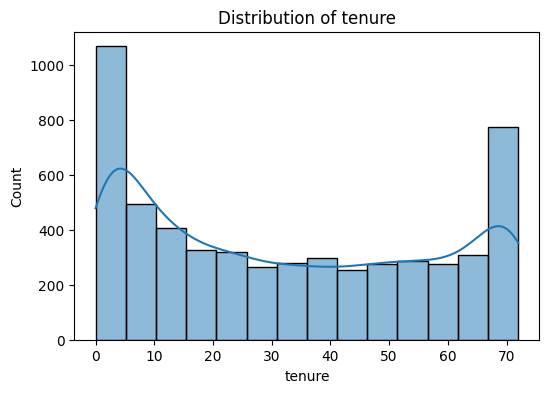

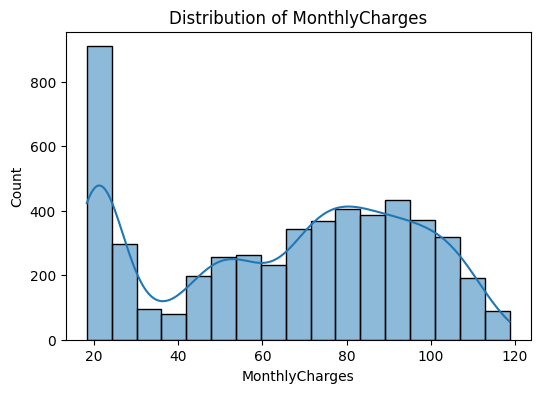

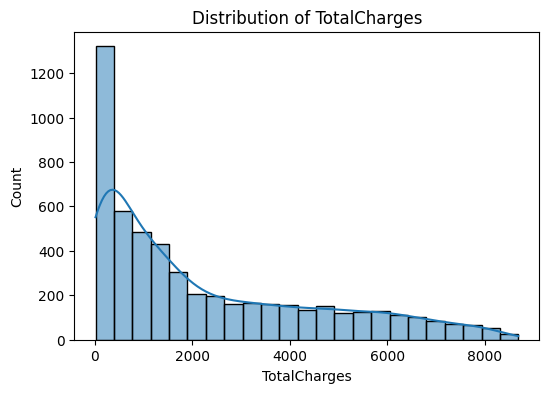

In [ ]:
#Numerical features
train_num = ['tenure', 'MonthlyCharges', 'TotalCharges']

for col in train_num:
    plt.figure(figsize=(6, 4))
    sns.histplot(df_train[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()




2.   relationship with the target variable



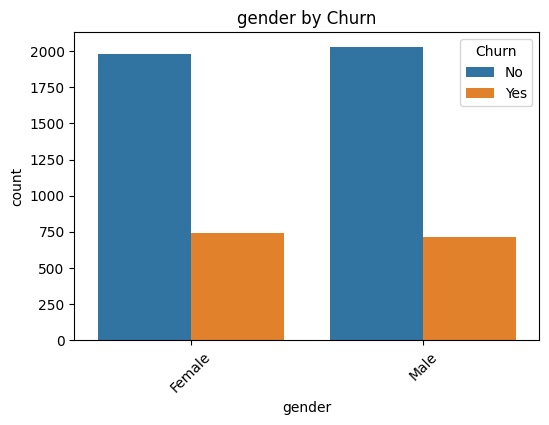

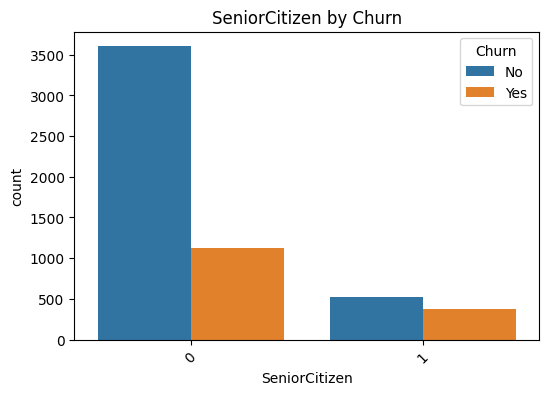

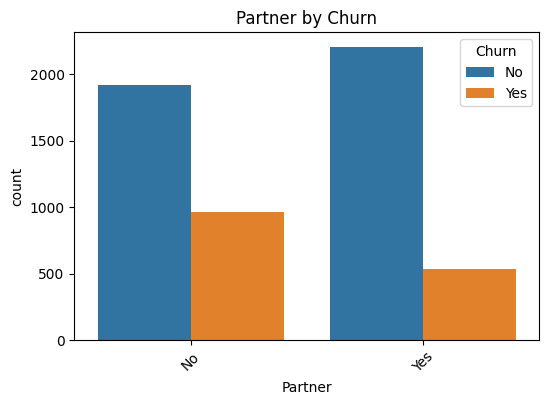

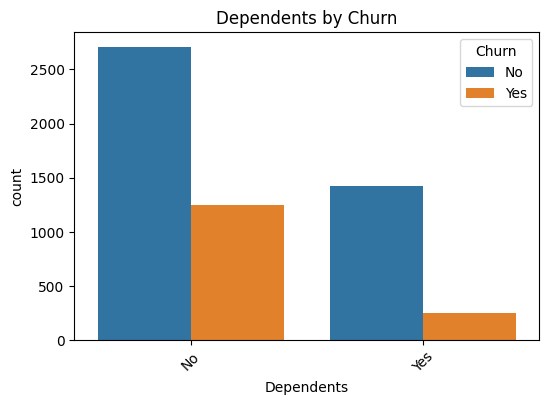

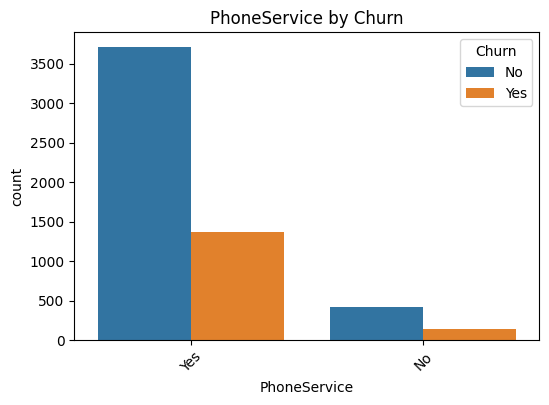

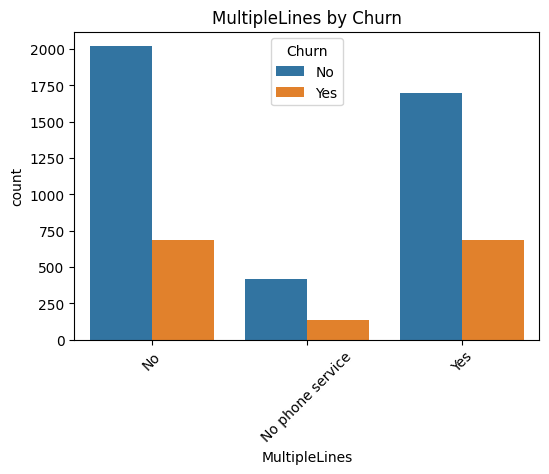

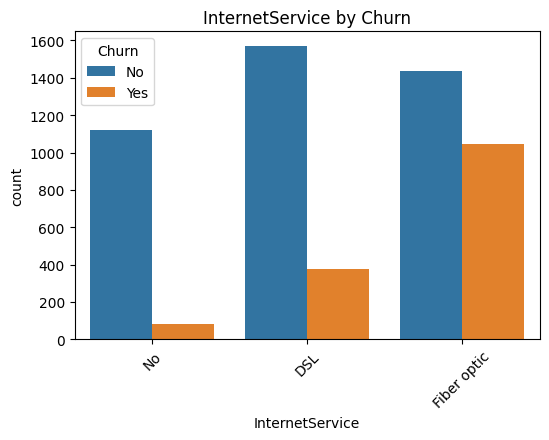

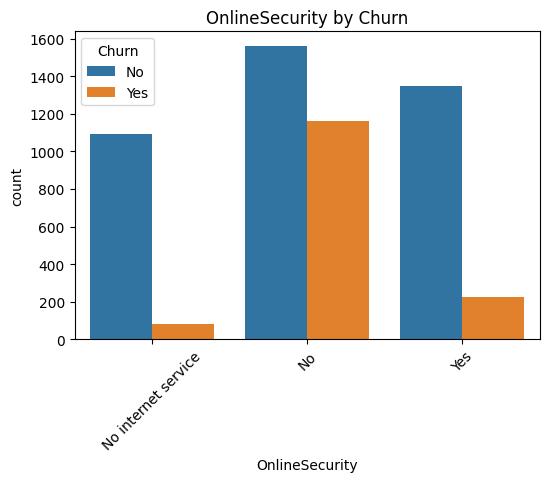

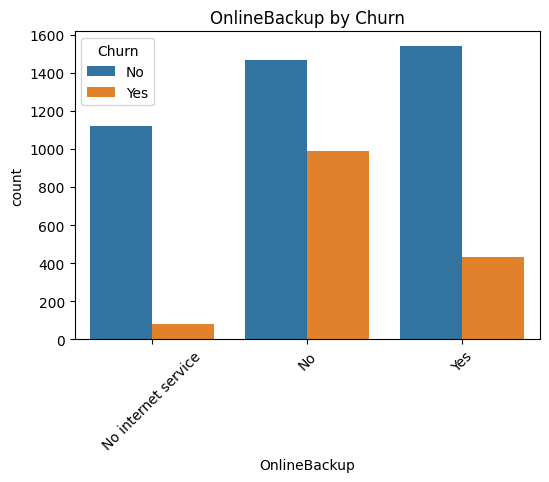

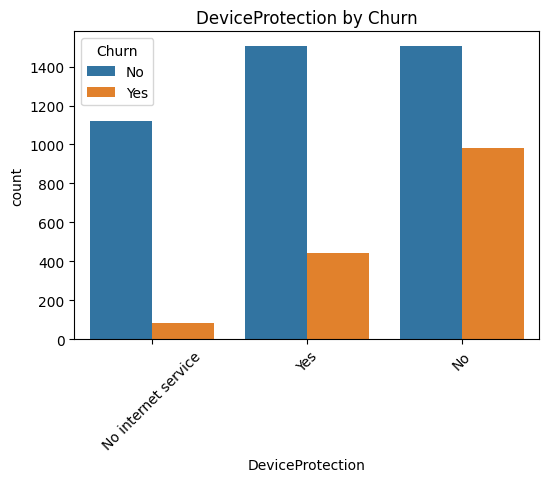

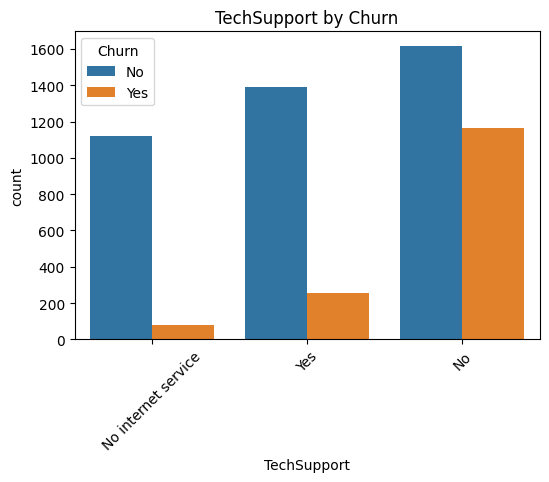

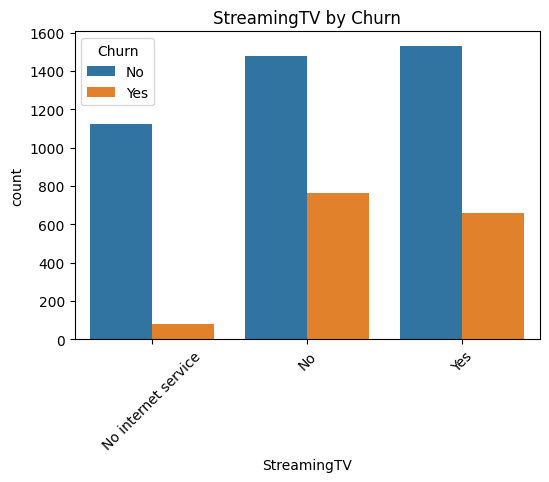

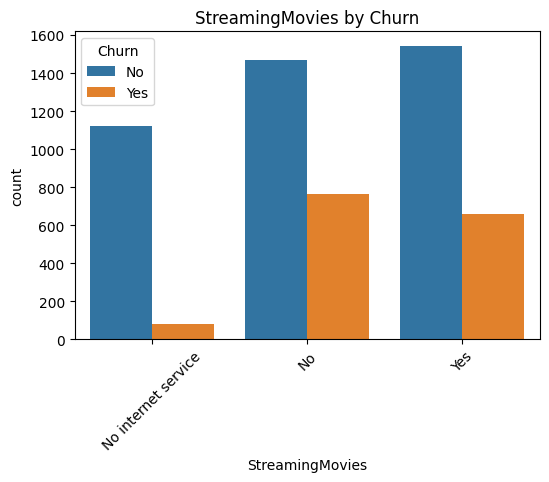

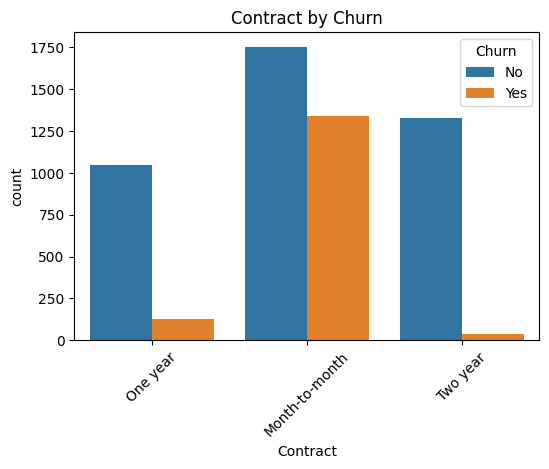

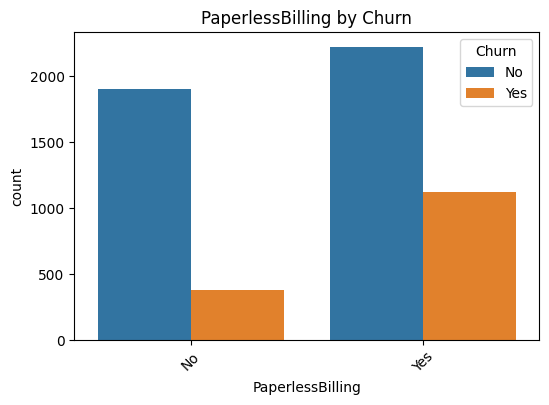

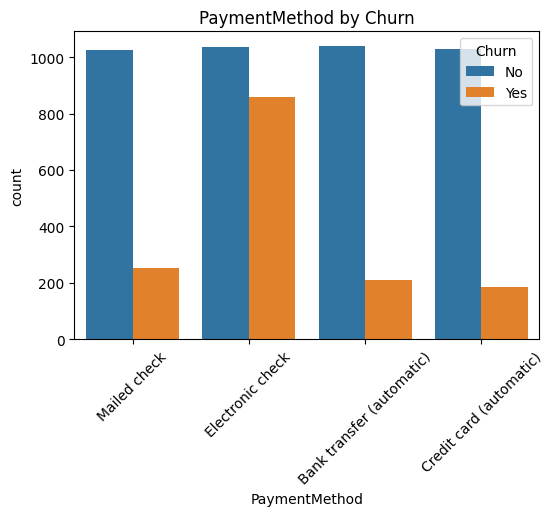

In [ ]:
#Categorical vs Target
for col in train_cat:
    if col != 'Churn':
        plt.figure(figsize=(6, 4))
        sns.countplot(data=df_train, x=col, hue='Churn')
        plt.title(f'{col} by Churn')
        plt.xticks(rotation=45)
        plt.show()

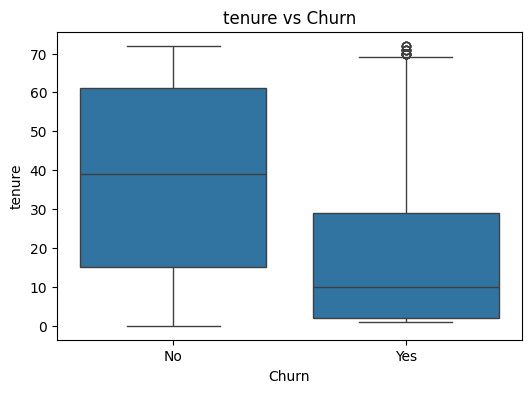

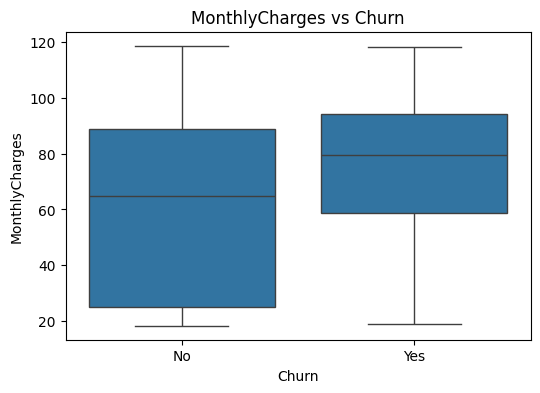

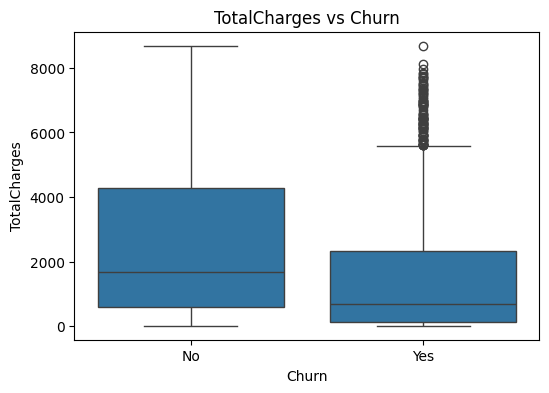

In [ ]:
#Numerical vs Target
for col in train_num:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x='Churn', y=col, data=df_train)
    plt.title(f'{col} vs Churn')
    plt.show()



3.   Correlation Heatmap



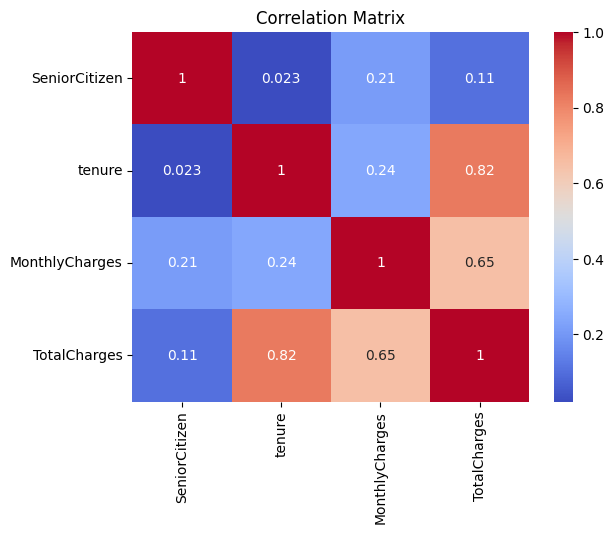

In [ ]:
# Compute correlation matrix for numeric columns only
corr_matrix = df_train.select_dtypes(include=np.number).corr()

# Plot heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()




In [ ]:
df_train.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [ ]:
#Outliers

# Get a list of all numerical column names except 'target-Churn'
num = df_train.select_dtypes(include=['number']).columns.tolist()
print(num)


['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']


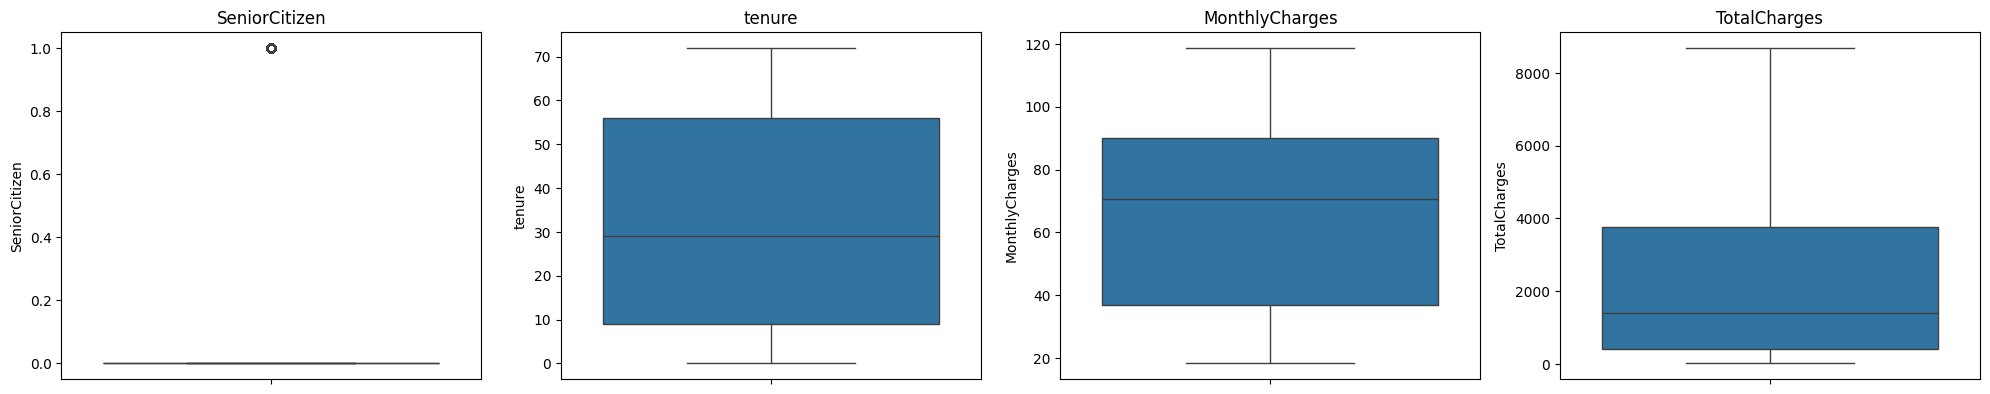

In [ ]:
# Create boxplots for each numerical column (except 'Sale Price') to detect outliers
plt.figure(figsize=(20, 15))
for i, col in enumerate(num):
    plt.subplot(4, 4, i + 1)  # Arrange subplots in a 4x4 grid
    sns.boxplot(y=df_train[col])   # Boxplot for the current column
    plt.title(col)           # Set column name as the title
plt.tight_layout()           # Adjust layout to prevent overlap
plt.show()                   # Display all plots

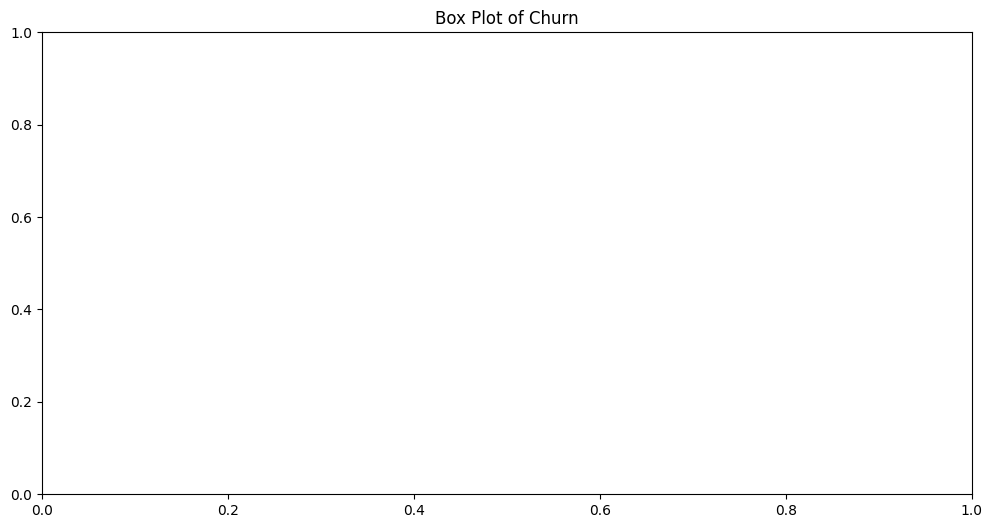

In [ ]:
# Create a boxplot for 'Sale Price' to visualize distribution and outliers
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_train[['Churn']])
plt.title('Box Plot of Churn')
plt.show()

## 2. Data Preprocessing:



In [ ]:
# Drop the customerID' column

df_train.drop('customerID',inplace=True,axis=1)

In [ ]:
df_train.isna().sum()*100

,0
gender,16900
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,16900
OnlineBackup,0


In [ ]:
#Handle missing values in the dataset
df_train['gender'] = df_train['gender'].fillna(df_train['gender'].mode()[0])
df_train['OnlineSecurity'] = df_train['OnlineSecurity'].fillna(df_train['OnlineSecurity'].mode()[0])
df_train['MonthlyCharges'] = pd.to_numeric(df_train['MonthlyCharges'], errors='coerce')
df_train['MonthlyCharges'] = df_train['MonthlyCharges'].fillna(df_train['MonthlyCharges'].mean())
df_train['TotalCharges'] = df_train['TotalCharges'].fillna(df_train['TotalCharges'].mean())

In [ ]:
df_train.isna().sum()

,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0
OnlineBackup,0


In [ ]:
#Handle outliers
# Calculate IQR and outlier limits for the specified column
Q1 = df_train[train_num].quantile(0.25)          # 25th percentile
Q3 = df_train[train_num].quantile(0.75)          # 75th percentile
IQR = Q3 - Q1                                 # Interquartile Range
low_limit = Q1 - 1.5 * IQR                    # Lower bound for outliers
up_limit = Q3 + 1.5 * IQR                     # Upper bound for outliers
print(Q1, Q3, IQR, low_limit, up_limit)


tenure              9.0000
MonthlyCharges     44.0000
TotalCharges      446.0625
Name: 0.25, dtype: float64 tenure              56.0000
MonthlyCharges      89.1000
TotalCharges      3590.5375
Name: 0.75, dtype: float64 tenure              47.000
MonthlyCharges      45.100
TotalCharges      3144.475
dtype: float64 tenure             -61.50
MonthlyCharges     -23.65
TotalCharges     -4270.65
dtype: float64 tenure             126.50
MonthlyCharges     156.75
TotalCharges      8307.25
dtype: float64


In [ ]:
non_outliers = ~((df_train[train_num] < low_limit) | (df_train[train_num] > up_limit)).any(axis=1)

In [ ]:
df_train_new=df_train[non_outliers]

In [ ]:
df_train.shape

(5634, 20)

In [ ]:
df_train_new.shape

(5610, 20)

In [ ]:
# Normalize/scale the numerical features where necessary.

# Scale selected numerical columns between 0 and 1
df_train_new[train_num] = MinMaxScaler(feature_range=(0,1)).fit_transform(df_train_new[train_num])
df_train_new

/tmp/ipython-input-1322120247.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train_new[train_num] = MinMaxScaler(feature_range=(0,1)).fit_transform(df_train_new[train_num])


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,No,No,0.486111,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,0.024913,0.082247,No
1,Female,0,No,No,0.388889,No,No phone service,DSL,No,No,Yes,Yes,No,No,Month-to-month,Yes,Mailed check,0.174390,0.113736,No
2,Male,0,No,No,0.777778,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,Yes,Month-to-month,No,Electronic check,0.800698,0.671180,No
3,Male,0,Yes,No,0.541667,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),0.021923,0.093053,No
4,Female,0,Yes,Yes,0.597222,No,No phone service,DSL,No,Yes,No,Yes,Yes,No,One year,Yes,Bank transfer (automatic),0.328849,0.257355,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5629,Male,0,No,No,0.708333,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,0.804684,0.605669,No
5630,Male,1,Yes,No,0.944444,No,No phone service,DSL,Yes,Yes,Yes,No,No,No,Two year,Yes,Electronic check,0.236173,0.355597,No
5631,Male,0,Yes,Yes,1.000000,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Bank transfer (automatic),0.016941,0.157351,No
5632,Female,0,No,No,0.958333,Yes,No,DSL,No,No,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),0.639761,0.668072,No


In [ ]:
#Deal with categorical variables through encoding techniques.
